# ECG Library

## Project structure

![project_structure](../docs/project_structure.png)

## Suggested pipeline

### Load ECG images

In [3]:
import os
from PIL import Image

In [4]:
dirname = 'examples/example_images/'

In [5]:
images = os.listdir(dirname)

In [6]:
images = sorted(images, key=lambda a: int(a.split('.')[0]))

In [7]:
images

['1.png',
 '2.png',
 '3.png',
 '4.png',
 '5.png',
 '6.png',
 '7.png',
 '8.png',
 '9.png',
 '10.png',
 '11.png',
 '12.png']

In [8]:
images = [Image.open(dirname + filename) for filename in images]

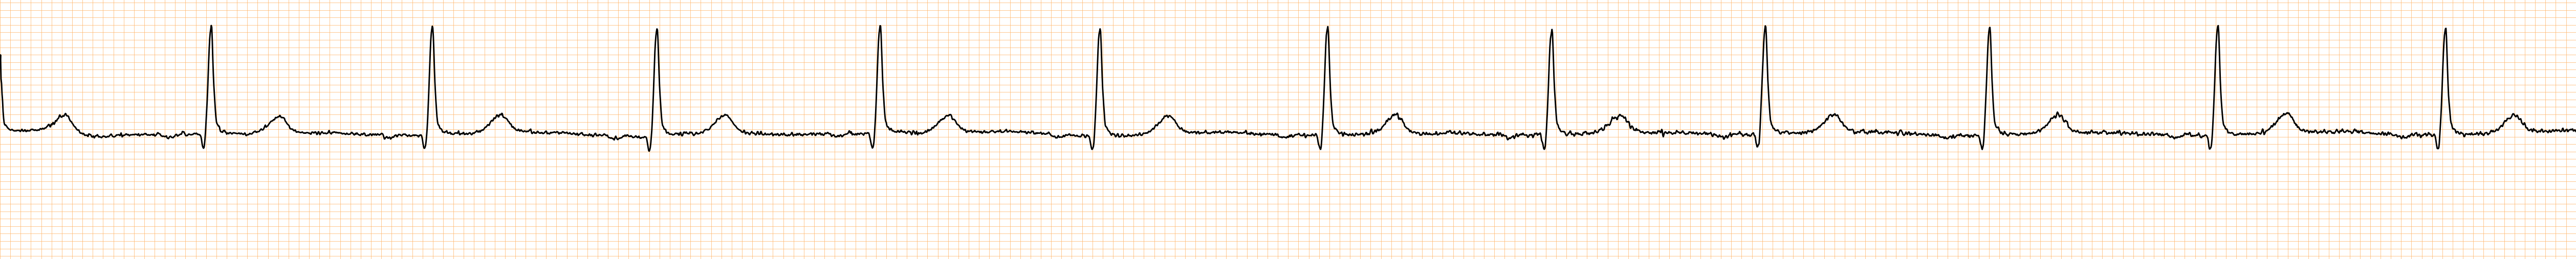

In [9]:
images[1]

### Convert images to signal

In [10]:
import ECG.api as api
import numpy as np

In [11]:
signal = [api.convert_image_to_signal(np.asarray(image)[:,:,:3]) for image in images]

### Get signal of all 12 ECG leads
Recommended sampling rate is 500

In [12]:
sampling_rate = 500

In [13]:
mm_per_mv = 10

In [14]:
signal = np.asarray([i / mm_per_mv for i in signal])

In [15]:
assert len(signal.shape) == 2
assert signal.shape[0] == 12

### Check whether ST-elevation is present

In [16]:
api.check_ST_elevation(signal, sampling_rate=sampling_rate)

(<ElevatedST.Abscent: 'No significant ST elevation'>,
 TextExplanation(content='ST elevation value in lead V3 (0.04126003416910934 mV) did not exceed the threshold 0.2, therefore ST elevation was not detected.'))

In [17]:
api.check_ST_elevation_with_NN(signal)

Load model at ./ECG/NN_based_approach/Models/Conv1_ste_model.pt


(<ElevatedST.Abscent: 'No significant ST elevation'>,
 TextAndImageExplanation(text='Significant ST elevation probability is 0.3325', image=<PIL.Image.Image image mode=RGB size=4000x12 at 0x7F6191D10730>))

### Evaluate risk markers

In [18]:
api.evaluate_risk_markers(signal, sampling_rate=sampling_rate)

RiskMarkers(Ste60_V3=0.04126003416910934, QTc=419, RA_V4=0.9481276953640756)

### Perform differential diagnosis

In [19]:
api.diagnose_with_risk_markers(signal, sampling_rate=sampling_rate)

(<Diagnosis.BER: 'Benign Early Repolarization'>,
 TextExplanation(content='Criterion value calculated as follows: (1.196 * [STE60 V3 in mm]) + (0.059 * [QTc in ms]) – (0.326 * [RA V4 in mm])) = 22.123573721775664 did not exceed the threshold 23.4, therefore the diagnosis is Benign Early Repolarization'))

In [20]:
api.check_BER_with_NN(signal)

Load model at ./ECG/NN_based_approach/Models/Conv_ber_model.pt


(True,
 TextAndImageExplanation(text='BER probability is 0.9278', image=<PIL.Image.Image image mode=RGB size=5000x12 at 0x7F619057E9D0>))

In [21]:
api.check_MI_with_NN(signal)

Load model at ./ECG/NN_based_approach/Models/Conv_mi_model.pt


(False,
 TextAndImageExplanation(text='MI probability is 0.0017', image=<PIL.Image.Image image mode=RGB size=5000x12 at 0x7F6191D02250>))